<h2 align='center'>| Twitter Sentiment Analysis |</h2>

In [4]:
#importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re 
import string 
import nltk 
import warnings

warnings.filterwarnings('ignore')

In [5]:
#loading the dataset
twitter_data = pd.read_csv('Twitter Sentiments.csv')
twitter_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
#data information
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## Pre-processing the Data

In [6]:
# removes the pattern in the input data

def remove_pattern(input_txt, pattern):
    r =re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word," ",input_txt)
    return input_txt

In [7]:
twitter_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
# remove twitter handles (@user)

twitter_data['clean_tweet'] = np.vectorize(remove_pattern)(twitter_data['tweet'], "@[\w]*")
twitter_data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [9]:
#remove special characters, numbers and punctuations
twitter_data['clean_tweet'] = twitter_data['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
twitter_data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [11]:
# remove short words
twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
twitter_data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [12]:
# individual words considered as tokens
tokenized_tweet = twitter_data['clean_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [13]:
#stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [14]:
#combine the words into single sentence

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

twitter_data['clean_tweet'] = tokenized_tweet
twitter_data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


<h3 align='center'>Exploratory Data Analysis</h3>

In [15]:
!pip install wordcloud


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


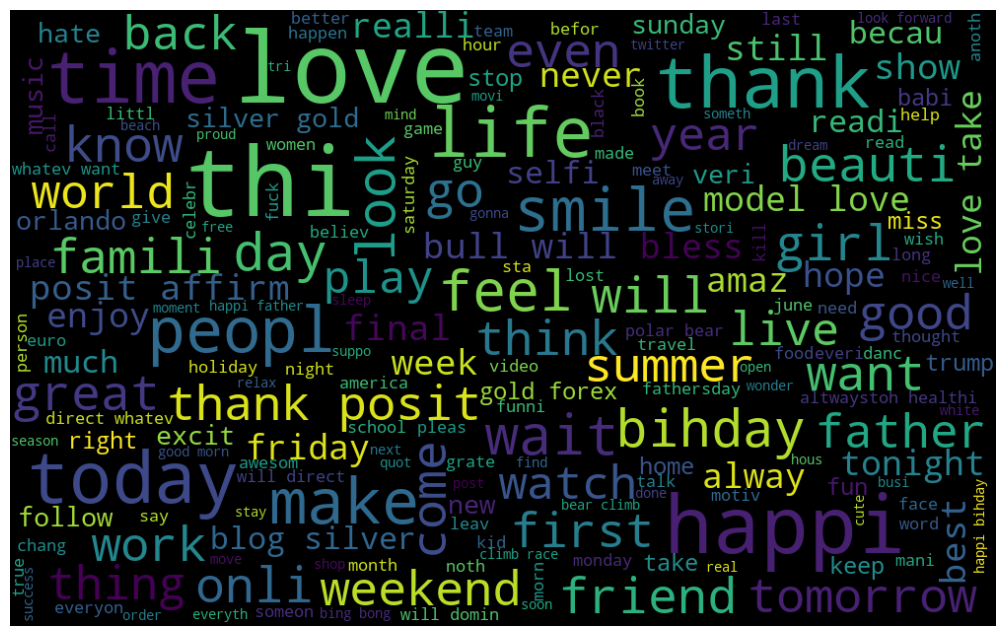

In [20]:
#visualiza the frequent words
all_words = " ".join([sentence for sentence in twitter_data['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=625, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

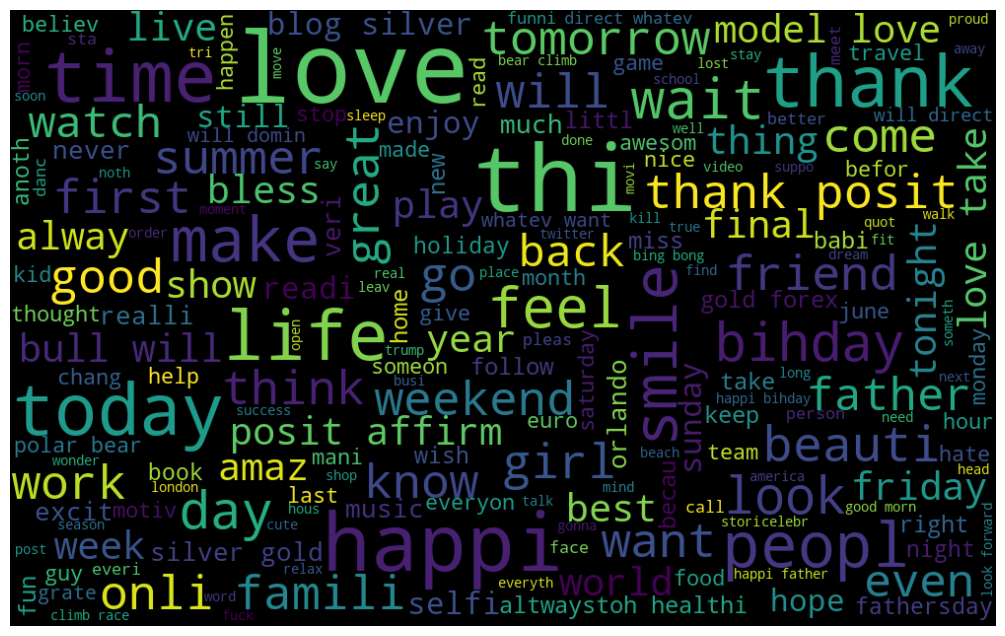

In [21]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in twitter_data['clean_tweet'][twitter_data['label']==0]])

wordcloud = WordCloud(width=1000, height=625, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

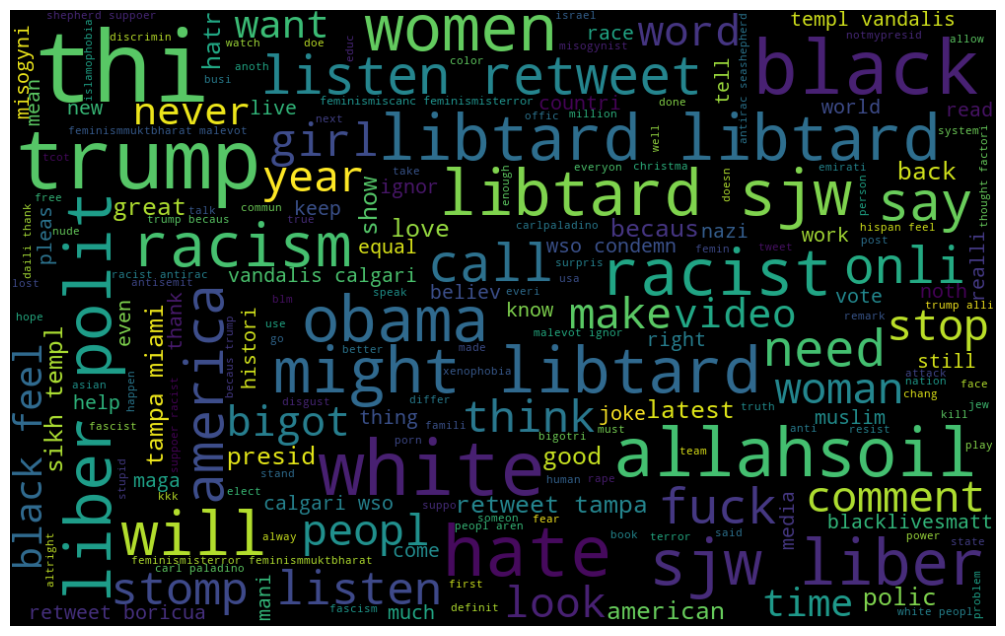

In [22]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in twitter_data['clean_tweet'][twitter_data['label']==1]])

wordcloud = WordCloud(width=1000, height=625, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    #loop words in the tweet
    for tweet in tweets:
        ht=re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [27]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(twitter_data['clean_tweet'][twitter_data['label']==0])

In [28]:
# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(twitter_data['clean_tweet'][twitter_data['label']==1])

In [29]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [30]:
#unnest list

ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [31]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [33]:
freq = nltk.FreqDist(ht_positive)
postive_hash = pd.DataFrame({'Hashtag': list(freq.keys()),
'Count': list(freq.values())})
postive_hash.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


In [34]:
postive_hash.shape

(19495, 2)

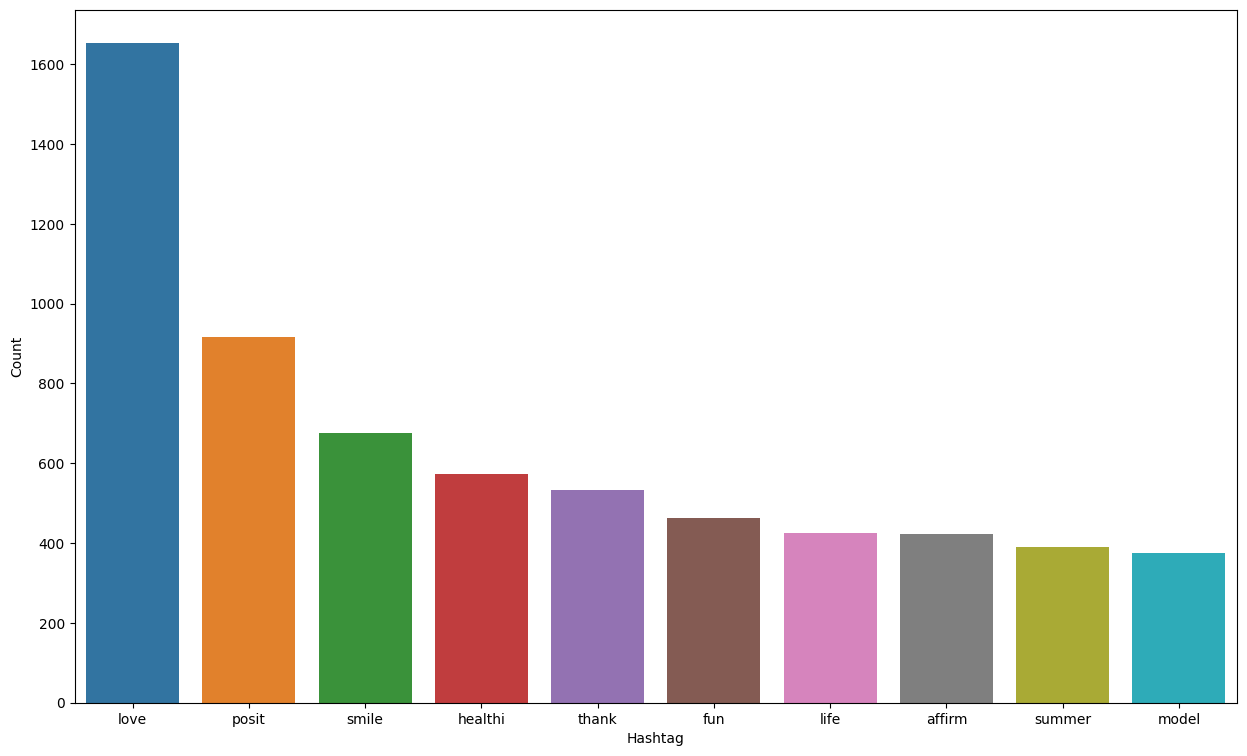

In [35]:
#select top 10 hashtags
postive_hash = postive_hash.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=postive_hash, x='Hashtag', y='Count')
plt.show()

In [36]:
freq = nltk.FreqDist(ht_negative)
negative_hash = pd.DataFrame({'Hashtag': list(freq.keys()),
'Count': list(freq.values())})
negative_hash.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


In [37]:
negative_hash.shape

(1719, 2)

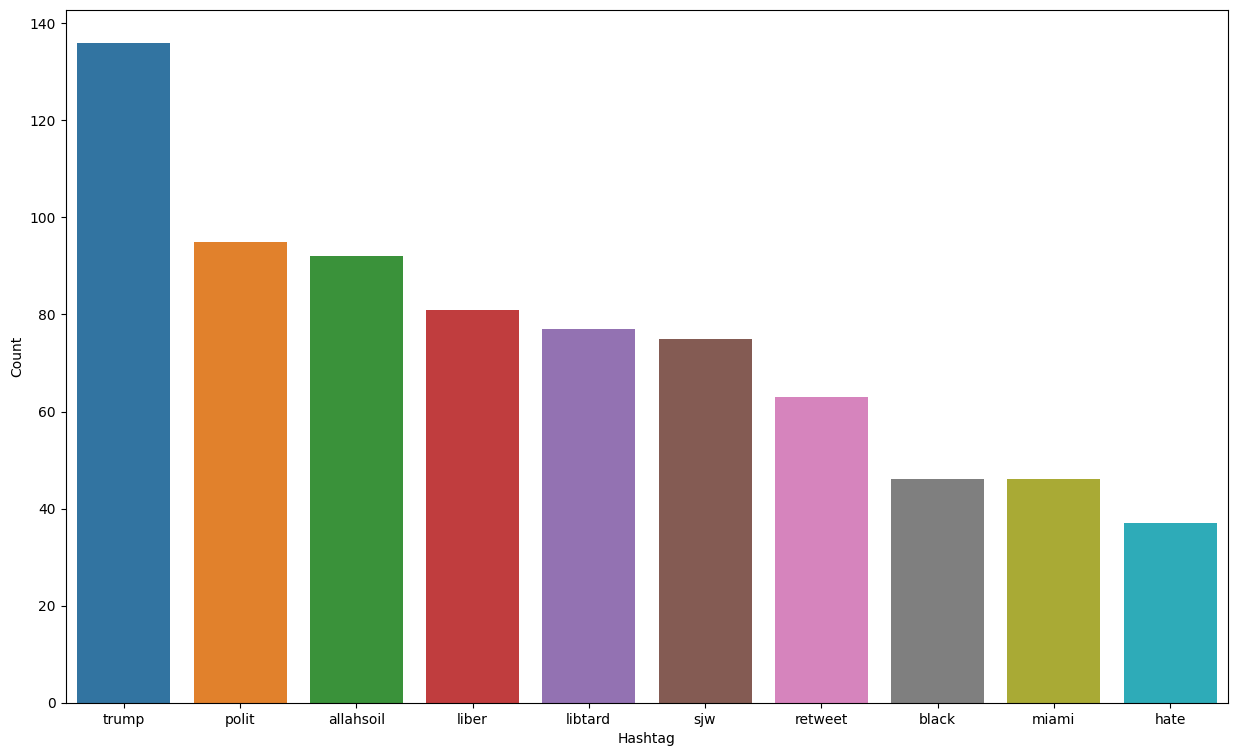

In [38]:
negative_hash = negative_hash.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=negative_hash, x='Hashtag', y='Count')
plt.show()

In [39]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(twitter_data['clean_tweet'])

In [41]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(bow, twitter_data['label'], random_state=42, test_size=0.2)

Model Training

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [43]:
#training
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [44]:
#testing
pred = model.predict(X_test)
f1_score(Y_test, pred)

0.49343065693430654

In [45]:
accuracy_score(Y_test, pred)

0.9457218833098702